In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('gail.csv') 

In [3]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-20,111.000031,116.250031,110.862526,115.087524,93.429550,16778683
1,2017-11-21,116.100029,116.450027,114.650024,114.987526,93.348351,23276322
2,2017-11-22,115.500031,117.612526,114.162529,117.262527,95.195244,12653240
3,2017-11-23,117.500031,117.975029,114.612526,115.725029,93.947083,7026326
4,2017-11-24,116.000031,118.087532,115.775024,117.762527,95.601135,11725421
...,...,...,...,...,...,...,...
1230,2022-11-14,88.599998,88.650002,87.900002,88.099998,88.099998,7996003
1231,2022-11-15,88.099998,90.000000,88.050003,89.900002,89.900002,8247787
1232,2022-11-16,90.000000,91.250000,89.250000,90.500000,90.500000,10223428
1233,2022-11-17,90.500000,90.900002,89.349998,90.150002,90.150002,4925266


In [4]:
#See the yahoo finance ticker for your stock symbol
stock_symbol = 'GAIL.NS'

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-20,111.000031,116.250031,110.862526,115.087524,93.429550,16778683
1,2017-11-21,116.100029,116.450027,114.650024,114.987526,93.348351,23276322
2,2017-11-22,115.500031,117.612526,114.162529,117.262527,95.195244,12653240
3,2017-11-23,117.500031,117.975029,114.612526,115.725029,93.947083,7026326
4,2017-11-24,116.000031,118.087532,115.775024,117.762527,95.601135,11725421


In [7]:
len(data)

1235

In [8]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1230,2022-11-14,88.599998,88.650002,87.900002,88.099998,88.099998,7996003
1231,2022-11-15,88.099998,90.000000,88.050003,89.900002,89.900002,8247787
1232,2022-11-16,90.000000,91.250000,89.250000,90.500000,90.500000,10223428
1233,2022-11-17,90.500000,90.900002,89.349998,90.150002,90.150002,4925266
1234,2022-11-18,90.650002,91.550003,89.800003,90.300003,90.300003,14395881


In [ ]:
opn = data[['Open']] 


In [10]:
opn

,Open
0,111.000031
1,116.100029
2,115.500031
3,117.500031
4,116.000031
...,...
1230,88.599998
1231,88.099998
1232,90.000000
1233,90.500000


In [11]:
type(opn)

pandas.core.frame.DataFrame

<AxesSubplot:>

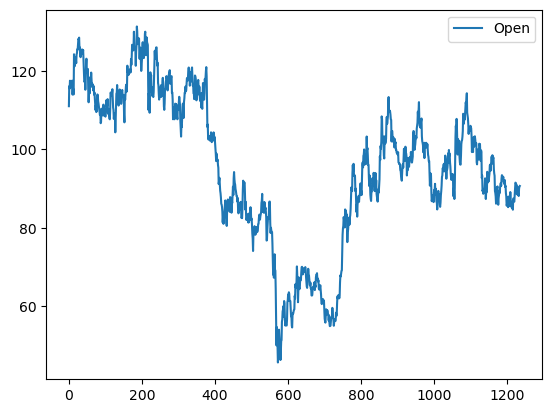

In [12]:
opn.plot()

In [13]:
import matplotlib.pyplot as plt

In [14]:
ds = opn.values
##

In [15]:
ds

array([[111.000031],
       [116.100029],
       [115.500031],
       ...,
       [ 90.      ],
       [ 90.5     ],
       [ 90.650002]])

In [16]:
type(ds)

numpy.ndarray

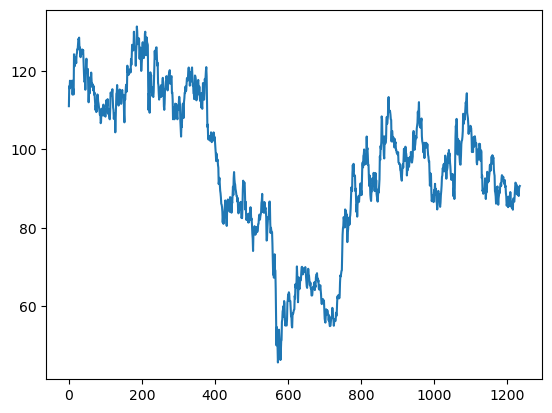

In [17]:
plt.plot(ds)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
#Using MinMaxScaler for normalizing data between 0 & 1, x1=(1 to 20) and x2=(50-1000) and y 
#used to predict then minmax scaler is biased to a greater value
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [20]:
len(ds_scaled), len(ds)

(1235, 1235)

In [21]:
#Defining test and train data sizes 70% for training and rest for testing
train_size = int(len(ds_scaled)*0.70)
test_size = len(ds_scaled) - train_size

In [22]:
train_size,test_size

(864, 371)

In [23]:
#Splitting data between train and test
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]

In [24]:
len(ds_train),len(ds_test)

(864, 371)

In [25]:
#creating dataset in time series for LSTM model  single record for x and y
#this fnc takes len(x) records and predicts the next value
#X[100,120,140,160,180] : Y[200]
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [26]:
#Taking 100 days price as one record for training
time_stamp = 100
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)

In [27]:
X_train.shape,y_train.shape

((763, 100), (763,))

In [28]:
X_test.shape, y_test.shape

((270, 100), (270,))

In [29]:
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [30]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [31]:
#Creating LSTM model using keras
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [32]:
#Training model with adam optimizer and mean squared error loss function
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
12/12 [==============================] - 10s 325ms/step - loss: 0.0863 - val_loss: 0.0135
Epoch 2/100
12/12 [==============================] - 2s 187ms/step - loss: 0.0180 - val_loss: 0.0144
Epoch 3/100
12/12 [==============================] - 2s 190ms/step - loss: 0.0094 - val_loss: 0.0031
Epoch 4/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0060 - val_loss: 0.0031
Epoch 5/100
12/12 [==============================] - 2s 208ms/step - loss: 0.0050 - val_loss: 0.0037
Epoch 6/100
12/12 [==============================] - 2s 205ms/step - loss: 0.0048 - val_loss: 0.0037
Epoch 7/100
12/12 [==============================] - 2s 203ms/step - loss: 0.0046 - val_loss: 0.0033
Epoch 8/100
12/12 [==============================] - 2s 205ms/step - loss: 0.0045 - val_loss: 0.0031
Epoch 9/100
12/12 [==============================] - 2s 207ms/step - loss: 0.0043 - val_loss: 0.0031
Epoch 10/100
12/12 [==============================] - 3s 216ms/step - loss: 0.0043 - val_l

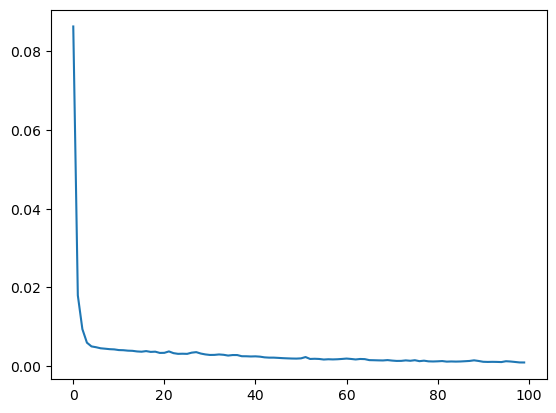

In [33]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
loss = model.history.history['loss']
plt.plot(loss)

In [34]:
#Predicitng on train and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

9/9 [==============================] - 1s 58ms/step


In [35]:
#Inverse transform to get actual value
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

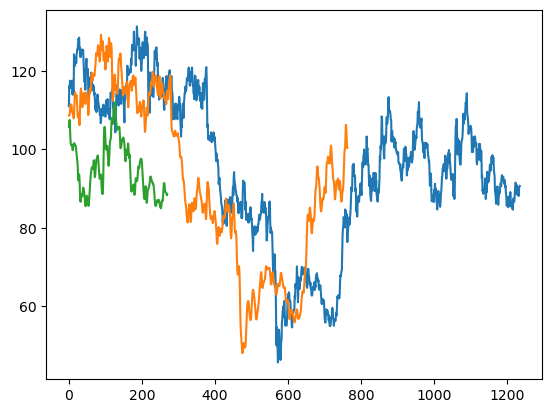

In [36]:
#Comparing using visuals
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(train_predict)
plt.plot(test_predict)

In [37]:
type(train_predict)

numpy.ndarray

In [38]:
test = np.vstack((train_predict,test_predict))

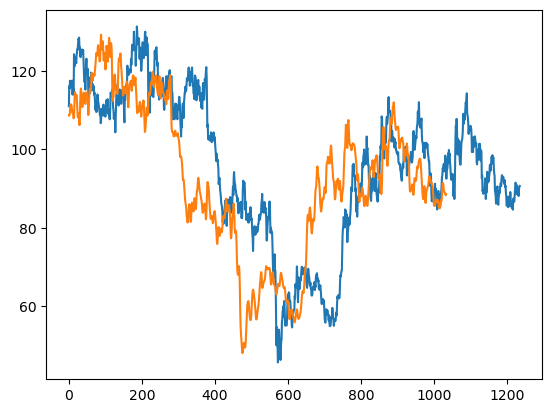

In [39]:
#Combining the predited data to create uniform data visualization
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(test)

In [40]:
len(ds_test)

371

In [41]:
#Getting the last 100 days records
fut_inp = ds_test[270:]

In [42]:
fut_inp = fut_inp.reshape(1,-1)

In [43]:
tmp_inp = list(fut_inp)

In [44]:
fut_inp.shape

(1, 101)

In [45]:
#Creating list of the last 100 data
tmp_inp = tmp_inp[0].tolist()

In [46]:
#Predicting next 30 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.5204312205314636], [0.5228390693664551], [0.5204253792762756], [0.5171652436256409], [0.5151064991950989], [0.5142286419868469], [0.5136847496032715], [0.5128437280654907], [0.5115891098976135], [0.5101146101951599], [0.5086371302604675], [0.5072553157806396], [0.5059595704078674], [0.5047017335891724], [0.5034468770027161], [0.5021871328353882], [0.5009288787841797], [0.49967873096466064], [0.4984373450279236], [0.49720072746276855], [0.4959627091884613], [0.4947192370891571], [0.4934673309326172], [0.49220576882362366], [0.4909335970878601], [0.489650160074234], [0.48835447430610657], [0.4870464503765106], [0.4857254922389984], [0.48439183831214905]]


In [47]:
len(ds_scaled)

1235

In [48]:
#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)

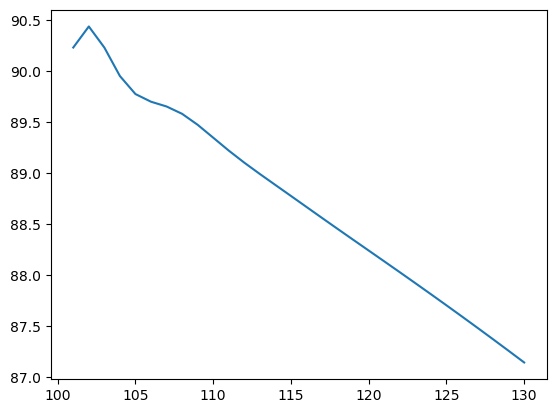

In [49]:
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))

In [50]:
ds_new = ds_scaled.tolist()

In [51]:
len(ds_new)

1235

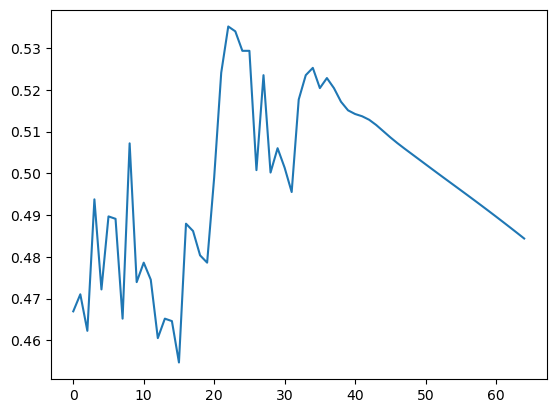

In [52]:
#Entends helps us to fill the missing value with approx value
ds_new.extend(lst_output)
plt.plot(ds_new[1200:])

In [53]:
#Creating final data for plotting
final_graph = normalizer.inverse_transform(ds_new).tolist()

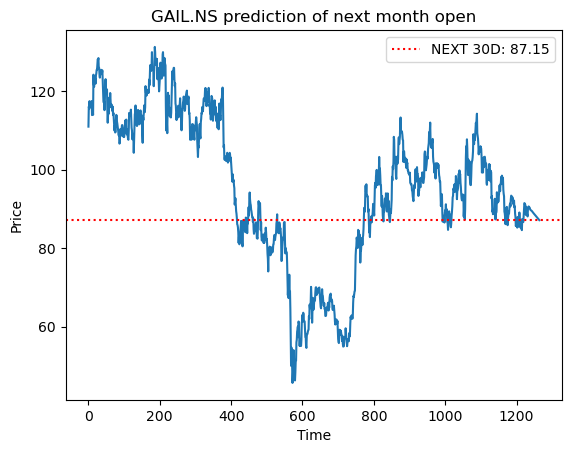

In [54]:
#Plotting final results with predicted value after 30 Days
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month open".format(stock_symbol))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()